In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

### The IowaHouseElections.csv file is a modified version of the IowaHouse.csv file - I kept only the 2012-2022 election data and created a Total (T) vote count column for each individual election per House district.

In [3]:
# Read in csv file
iowa_house = pd.read_csv('Files/IowaHouseElections.csv')

In [4]:
iowa_house.shape

(100, 101)

In [5]:
iowa_house.head()

,District ID,G22AgD,G22AgR,G22AgO,G22AgT,G22AgrCD,G22AgrCR,G22AgrCO,G22AgrCT,G22TreD,...,G14GovO,G14GovT,G14SenR,G14SenD,G14SenO,G14SenT,G12PreR,G12PreD,G12PreO,G12PreT
0,1,3057,2704,0,5761,2661,3076,0,5737,2970,...,166,6861,3082,3447,400,6929,3859,7133,163,11155
1,2,3683,4509,0,8192,2922,5260,0,8182,3533,...,245,9097,5007,3640,498,9145,6537,6575,263,13375
2,3,2736,8889,0,11625,1742,9998,0,11740,2703,...,97,11378,8796,2257,267,11320,11156,4146,125,15427
3,4,1598,10835,0,12433,1063,11423,0,12486,1643,...,81,11548,10263,1118,129,11510,13116,2484,113,15713
4,5,3196,8434,0,11630,1817,9881,0,11698,3155,...,129,12016,8583,2939,452,11974,10804,5402,151,16357


In [6]:
# Subsetting for total(T) vote count columns
iowa_house_e = iowa_house.loc[:, iowa_house.columns.str.contains('District ID|T$')]

In [7]:
iowa_house_e.head()

,District ID,G22AgT,G22AgrCT,G22TreT,G22AudT,G22SosT,G22GovT,G22SenT,G20PreT,G20SenT,...,G16PreT,G16SenT,G14AgT,G14AgrCT,G14TreT,G14AudT,G14SosT,G14GovT,G14SenT,G12PreT
0,1,5761,5737,5769,5775,5782,5754,5822,10538,10308,...,10536,10309,6725,6591,6610,6547,6679,6861,6929,11155
1,2,8192,8182,8187,8185,8241,8318,8299,13351,13118,...,12979,12774,8795,8710,8778,8537,8788,9097,9145,13375
2,3,11625,11740,11626,11683,11756,11997,11936,16935,16728,...,15897,15524,11086,10879,10989,10596,10829,11378,11320,15427
3,4,12433,12486,12386,12364,12502,12707,12663,17095,16833,...,16253,15952,11313,11189,11282,11061,11128,11548,11510,15713
4,5,11630,11698,11573,11553,11666,11815,11777,16800,16554,...,16483,16091,11636,11539,11486,11145,11374,12016,11974,16357


In [8]:
iowa_house_e.loc[:, iowa_house_e.columns.str.contains('22')].mean(axis=1)

0      5771.428571
1      8229.142857
2     11766.142857
3     12505.857143
4     11673.142857
          ...     
95     9418.000000
96     9325.428571
97     8792.428571
98    10420.714286
99    10606.285714
Length: 100, dtype: float64

In [9]:
# Calculate yearly averages for all elections vote totals
for year in range(12, 23, 2):
    iowa_house_e['20{}'.format(year)] = iowa_house_e.loc[:, iowa_house_e.columns.str.contains('{}'.format(year))].mean(axis=1)

In [10]:
iowa_house_e.head()

,District ID,G22AgT,G22AgrCT,G22TreT,G22AudT,G22SosT,G22GovT,G22SenT,G20PreT,G20SenT,...,G14SosT,G14GovT,G14SenT,G12PreT,2012,2014,2016,2018,2020,2022
0,1,5761,5737,5769,5775,5782,5754,5822,10538,10308,...,6679,6861,6929,11155,11155.0,6706.000000,10422.5,7800.666667,9488.361111,5771.428571
1,2,8192,8182,8187,8185,8241,8318,8299,13351,13118,...,8788,9097,9145,13375,13375.0,8835.714286,12876.5,10112.333333,11944.757937,8229.142857
2,3,11625,11740,11626,11683,11756,11997,11936,16935,16728,...,10829,11378,11320,15427,15427.0,11011.000000,15710.5,12005.500000,14636.166667,11766.142857
3,4,12433,12486,12386,12364,12502,12707,12663,17095,16833,...,11128,11548,11510,15713,15713.0,11290.142857,16102.5,12181.333333,14869.162698,12505.857143
4,5,11630,11698,11573,11553,11666,11815,11777,16800,16554,...,11374,12016,11974,16357,16357.0,11595.714286,16287.0,12176.000000,14961.619048,11673.142857


In [11]:
# Subsetting for yearly averages columns
iowa_house_y = iowa_house_e.drop(iowa_house_e.columns[1:26], axis=1)

In [12]:
iowa_house_y.shape

(100, 7)

In [13]:
iowa_house_y.head()

,District ID,2012,2014,2016,2018,2020,2022
0,1,11155.0,6706.000000,10422.5,7800.666667,9488.361111,5771.428571
1,2,13375.0,8835.714286,12876.5,10112.333333,11944.757937,8229.142857
2,3,15427.0,11011.000000,15710.5,12005.500000,14636.166667,11766.142857
3,4,15713.0,11290.142857,16102.5,12181.333333,14869.162698,12505.857143
4,5,16357.0,11595.714286,16287.0,12176.000000,14961.619048,11673.142857


In [14]:
iowa_house_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District ID  100 non-null    int64  
 1   2012         100 non-null    float64
 2   2014         100 non-null    float64
 3   2016         100 non-null    float64
 4   2018         100 non-null    float64
 5   2020         100 non-null    float64
 6   2022         100 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 5.6 KB


In [15]:
# Create features and target variables
features = iowa_house_y.drop(['District ID','2022'], axis=1)
target = iowa_house_y['2022']

In [16]:
# Split data into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [17]:
# rf = RandomForestRegressor(random_state=1)
# params = {'n_estimators': [100, 200, 300, 500, 1000],
#           'max_depth': [None, 10, 20, 30, 40, 50],
#           'min_samples_split': [2, 5, 10, 20]}
# kf = KFold(n_splits=5, shuffle=True, random_state=1)
# rf_grid = GridSearchCV(rf, param_grid=params, cv=kf)
# rf_grid.fit(X_train, y_train)

In [18]:
# rf_grid.best_params_

### I selected the RandomForestRegressor algorithm for this predictive task due to its strong resistance to overfitting, versatility in handling various regression tasks, and the advantage of not requiring standardization and normalization.

In [19]:
# Instantitate and fit RandomForestRegressor algorithm
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [20]:
# R2 Score using the testing set 
rf.score(X_test, y_test)

0.9266814091514212

In [21]:
# Predict values using testing set features
y_pred = rf.predict(X_test)

In [22]:
# Root Mean Square Error (RMSE) model score
mse(y_test, y_pred, squared=False)

612.0093789563263

In [23]:
iowa_house_y.head()

,District ID,2012,2014,2016,2018,2020,2022
0,1,11155.0,6706.000000,10422.5,7800.666667,9488.361111,5771.428571
1,2,13375.0,8835.714286,12876.5,10112.333333,11944.757937,8229.142857
2,3,15427.0,11011.000000,15710.5,12005.500000,14636.166667,11766.142857
3,4,15713.0,11290.142857,16102.5,12181.333333,14869.162698,12505.857143
4,5,16357.0,11595.714286,16287.0,12176.000000,14961.619048,11673.142857


In [24]:
# Create function to predict total vote per house district
def array_pred(year):
    array = np.array(iowa_house_y.drop(['District ID', year], axis=1).iloc[:,:])
    array_year = rf.predict(array)
    return array_year

In [25]:
# Average out vote totals per house district by dropping each year and predicting for 2024
array_avg_24 = (array_pred('2012')+array_pred('2014')+array_pred('2016')+array_pred('2018')+array_pred('2020')\
                +array_pred('2022'))/6

In [26]:
# Create new 2024 column with the averaged out prediction
iowa_house_y['2024'] = array_avg_24

In [27]:
iowa_house_y.head()

,District ID,2012,2014,2016,2018,2020,2022,2024
0,1,11155.0,6706.000000,10422.5,7800.666667,9488.361111,5771.428571,6868.972857
1,2,13375.0,8835.714286,12876.5,10112.333333,11944.757937,8229.142857,10875.965714
2,3,15427.0,11011.000000,15710.5,12005.500000,14636.166667,11766.142857,13174.487619
3,4,15713.0,11290.142857,16102.5,12181.333333,14869.162698,12505.857143,13205.400000
4,5,16357.0,11595.714286,16287.0,12176.000000,14961.619048,11673.142857,12950.184048


In [28]:
# Run new model to evaluate model performance using newly added predicted 2024 data
features = iowa_house_y.drop(['District ID', '2024'], axis=1)
target = iowa_house_y['2024']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [30]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [31]:
rf.score(X_test, y_test)

0.9456717705205738

In [32]:
# Average out vote totals per house district by dropping each year and predicting for 2026
array_avg_26 = (array_pred('2012')+array_pred('2014')+array_pred('2016')+array_pred('2018')+array_pred('2020')\
                +array_pred('2022')+array_pred('2024'))/7

In [33]:
# Create new 2026 column with the averaged out prediction
iowa_house_y['2026'] = array_avg_26

In [34]:
iowa_house_y.head()

,District ID,2012,2014,2016,2018,2020,2022,2024,2026
0,1,11155.0,6706.000000,10422.5,7800.666667,9488.361111,5771.428571,6868.972857,7732.181021
1,2,13375.0,8835.714286,12876.5,10112.333333,11944.757937,8229.142857,10875.965714,11313.711906
2,3,15427.0,11011.000000,15710.5,12005.500000,14636.166667,11766.142857,13174.487619,13099.135789
3,4,15713.0,11290.142857,16102.5,12181.333333,14869.162698,12505.857143,13205.400000,13162.513216
4,5,16357.0,11595.714286,16287.0,12176.000000,14961.619048,11673.142857,12950.184048,13013.747146


In [35]:
# Run new model to evaluate model performance using newly added predicted2026 data
features = iowa_house_y.drop(['District ID', '2026'], axis=1)
target = iowa_house_y['2026']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9982720121776409

In [36]:
# Average out vote totals per house district by dropping each year and predicting for 2028
array_avg_28 = (array_pred('2012')+array_pred('2014')+array_pred('2016')+array_pred('2018')+array_pred('2020')\
                +array_pred('2022')+array_pred('2024')+array_pred('2026'))/8

In [37]:
# Create new 2028 column with the averaged out prediction
iowa_house_y['2028'] = array_avg_28

In [38]:
iowa_house_y.head()

,District ID,2012,2014,2016,2018,2020,2022,2024,2026,2028
0,1,11155.0,6706.000000,10422.5,7800.666667,9488.361111,5771.428571,6868.972857,7732.181021,8515.048922
1,2,13375.0,8835.714286,12876.5,10112.333333,11944.757937,8229.142857,10875.965714,11313.711906,11248.502117
2,3,15427.0,11011.000000,15710.5,12005.500000,14636.166667,11766.142857,13174.487619,13099.135789,13083.218750
3,4,15713.0,11290.142857,16102.5,12181.333333,14869.162698,12505.857143,13205.400000,13162.513216,13160.157774
4,5,16357.0,11595.714286,16287.0,12176.000000,14961.619048,11673.142857,12950.184048,13013.747146,13069.036597


In [39]:
# Run new model to evaluate model performance using newly added predicted 2028 data
features = iowa_house_y.drop(['District ID', '2028'], axis=1)
target = iowa_house_y['2028']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9756094288693115

In [40]:
# Average out vote totals per house district by dropping each year and predicting for 2030
array_avg_30 = (array_pred('2012')+array_pred('2014')+array_pred('2016')+array_pred('2018')+array_pred('2020')\
                +array_pred('2022')+array_pred('2024')+array_pred('2026')+array_pred('2028'))/9

In [41]:
# Create new 2030 column with the averaged out prediction
iowa_house_y['2030'] = array_avg_30

In [42]:
iowa_house_y.head()

,District ID,2012,2014,2016,2018,2020,2022,2024,2026,2028,2030
0,1,11155.0,6706.000000,10422.5,7800.666667,9488.361111,5771.428571,6868.972857,7732.181021,8515.048922,8938.423805
1,2,13375.0,8835.714286,12876.5,10112.333333,11944.757937,8229.142857,10875.965714,11313.711906,11248.502117,11180.373455
2,3,15427.0,11011.000000,15710.5,12005.500000,14636.166667,11766.142857,13174.487619,13099.135789,13083.218750,12872.886203
3,4,15713.0,11290.142857,16102.5,12181.333333,14869.162698,12505.857143,13205.400000,13162.513216,13160.157774,13096.214359
4,5,16357.0,11595.714286,16287.0,12176.000000,14961.619048,11673.142857,12950.184048,13013.747146,13069.036597,12881.712562


In [43]:
# Run new model to evaluate model performance using newly added predicted 2030 data
features = iowa_house_y.drop(['District ID', '2030'], axis=1)
target = iowa_house_y['2030']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.996692348763545

In [44]:
# Read in democratic vote totals through 2030 csv file
iowa_lh_dem = pd.read_csv('Files/iowa_lh_dem.csv')
iowa_lh_dem.head()

,District ID,2012,2014,2016,2018,2020,2022,2024,2026,2028,2030
0,1,7133.0,3404.428571,4907.0,4758.333333,5225.960317,2835.142857,3089.948095,3042.785988,2910.982279,2831.556577
1,2,6575.0,3527.285714,4629.0,5208.833333,5254.019841,3283.000000,3259.702619,3128.643495,2993.138549,2879.224065
2,3,4146.0,2156.000000,2766.5,3625.166667,3422.277778,2312.857143,2333.152857,2380.840656,2411.034302,2443.500267
3,4,2484.0,1089.000000,1674.5,2375.500000,2038.333333,1388.571429,1800.150476,2019.186469,2168.220853,2266.248062
4,5,5402.0,2967.285714,3169.0,4243.000000,4016.714286,2579.428571,2501.218095,2492.106735,2512.317636,2511.066558


In [45]:
iowa_lh_dem['2024'].sum() / iowa_house_y['2024'].sum()

0.4133225082706581

In [46]:
# Merging vote totals and democratic vote totals datasets
iowa_t_d = iowa_house_y.merge(iowa_lh_dem, on='District ID', suffixes=('_t', '_d'))

In [47]:
iowa_t_d.head()

,District ID,2012_t,2014_t,2016_t,2018_t,2020_t,2022_t,2024_t,2026_t,2028_t,...,2012_d,2014_d,2016_d,2018_d,2020_d,2022_d,2024_d,2026_d,2028_d,2030_d
0,1,11155.0,6706.000000,10422.5,7800.666667,9488.361111,5771.428571,6868.972857,7732.181021,8515.048922,...,7133.0,3404.428571,4907.0,4758.333333,5225.960317,2835.142857,3089.948095,3042.785988,2910.982279,2831.556577
1,2,13375.0,8835.714286,12876.5,10112.333333,11944.757937,8229.142857,10875.965714,11313.711906,11248.502117,...,6575.0,3527.285714,4629.0,5208.833333,5254.019841,3283.000000,3259.702619,3128.643495,2993.138549,2879.224065
2,3,15427.0,11011.000000,15710.5,12005.500000,14636.166667,11766.142857,13174.487619,13099.135789,13083.218750,...,4146.0,2156.000000,2766.5,3625.166667,3422.277778,2312.857143,2333.152857,2380.840656,2411.034302,2443.500267
3,4,15713.0,11290.142857,16102.5,12181.333333,14869.162698,12505.857143,13205.400000,13162.513216,13160.157774,...,2484.0,1089.000000,1674.5,2375.500000,2038.333333,1388.571429,1800.150476,2019.186469,2168.220853,2266.248062
4,5,16357.0,11595.714286,16287.0,12176.000000,14961.619048,11673.142857,12950.184048,13013.747146,13069.036597,...,5402.0,2967.285714,3169.0,4243.000000,4016.714286,2579.428571,2501.218095,2492.106735,2512.317636,2511.066558


In [48]:
# Subsetting to District ID and 2030 columns
iowa_d_30 = iowa_t_d[['District ID', '2030_t', '2030_d']]
iowa_d_30.head()

,District ID,2030_t,2030_d
0,1,8938.423805,2831.556577
1,2,11180.373455,2879.224065
2,3,12872.886203,2443.500267
3,4,13096.214359,2266.248062
4,5,12881.712562,2511.066558


In [49]:
iowa_d_30.shape

(100, 3)

In [50]:
# Calculating democratic vote share percentage of total
iowa_d_30['Perct_d'] = (iowa_d_30['2030_d'] / iowa_d_30['2030_t']) * 100

In [51]:
iowa_d_30.head()

,District ID,2030_t,2030_d,Perct_d
0,1,8938.423805,2831.556577,31.678478
1,2,11180.373455,2879.224065,25.752486
2,3,12872.886203,2443.500267,18.981759
3,4,13096.214359,2266.248062,17.304604
4,5,12881.712562,2511.066558,19.493266


In [52]:
iowa_d_30['Perct_d'].max()

69.64269195153499

In [53]:
# Reading in 2030 population prediction csv file
ia_pop_2030_lh = pd.read_csv('Files/ia_pop_2030_lh.csv')

In [54]:
ia_pop_2030_lh.head()

,District ID,pop_pred_2030
0,1,32493.883335
1,2,33207.568625
2,3,33238.121067
3,4,33526.792287
4,5,30968.149919


In [55]:
# Merge 2030 population data to 2030 election data
ia_d_pop_2030 = iowa_d_30.merge(ia_pop_2030_lh, on='District ID')

In [56]:
ia_d_pop_2030.head()

,District ID,2030_t,2030_d,Perct_d,pop_pred_2030
0,1,8938.423805,2831.556577,31.678478,32493.883335
1,2,11180.373455,2879.224065,25.752486,33207.568625
2,3,12872.886203,2443.500267,18.981759,33238.121067
3,4,13096.214359,2266.248062,17.304604,33526.792287
4,5,12881.712562,2511.066558,19.493266,30968.149919


In [57]:
ia_d_pop_2030.shape

(100, 5)

In [58]:
# Read in Iowa census shapefiles for lower house districts
ia_map = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2023/shp/cb_2023_19_sldl_500k.zip')

In [59]:
ia_map.head()

,STATEFP,SLDLST,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER,geometry
0,19,015,620L800US19015,19015,15,State House District 15,IA,Iowa,LL,2022,2508376591,21042751,"POLYGON ((-96.13750 41.86631, -96.05962 41.864..."
1,19,046,620L800US19046,19046,46,State House District 46,IA,Iowa,LL,2022,366333250,1834551,"POLYGON ((-94.04803 41.86313, -94.01833 41.863..."
2,19,083,620L800US19083,19083,83,State House District 83,IA,Iowa,LL,2022,1209135083,13674180,"POLYGON ((-91.83476 42.08249, -91.83472 42.082..."
3,19,013,620L800US19013,19013,13,State House District 13,IA,Iowa,LL,2022,5365646422,20013618,"POLYGON ((-96.53827 42.64902, -96.53826 42.649..."
4,19,030,620L800US19030,19030,30,State House District 30,IA,Iowa,LL,2022,42376928,61004,"POLYGON ((-93.70337 41.55565, -93.65943 41.555..."


In [60]:
ia_map.shape

(100, 13)

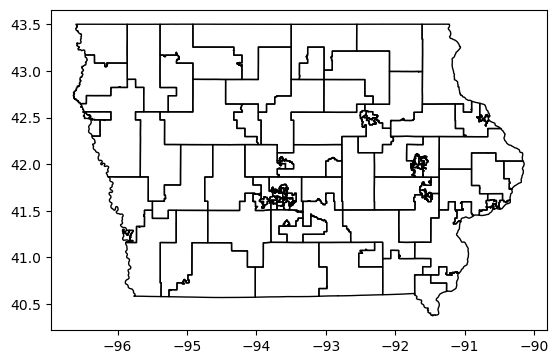

In [61]:
ia_map.plot(facecolor='none', edgecolor='black');

In [62]:
# Rename NAME column to District ID to be able to easily merge datasets
ia_map = ia_map.rename(columns={'NAME': 'District ID'})
ia_map['District ID'] = ia_map['District ID'].astype(int)

In [63]:
ia_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   STATEFP      100 non-null    object  
 1   SLDLST       100 non-null    object  
 2   GEOIDFQ      100 non-null    object  
 3   GEOID        100 non-null    object  
 4   District ID  100 non-null    int64   
 5   NAMELSAD     100 non-null    object  
 6   STUSPS       100 non-null    object  
 7   STATE_NAME   100 non-null    object  
 8   LSAD         100 non-null    object  
 9   LSY          100 non-null    object  
 10  ALAND        100 non-null    int64   
 11  AWATER       100 non-null    int64   
 12  geometry     100 non-null    geometry
dtypes: geometry(1), int64(3), object(9)
memory usage: 10.3+ KB


In [64]:
# Merge census data with population and election data
ia_geocoded_2030_lh = ia_d_pop_2030.merge(ia_map, on='District ID')

In [65]:
ia_geocoded_2030_lh.head()

,District ID,2030_t,2030_d,Perct_d,pop_pred_2030,STATEFP,SLDLST,GEOIDFQ,GEOID,NAMELSAD,STUSPS,STATE_NAME,LSAD,LSY,ALAND,AWATER,geometry
0,1,8938.423805,2831.556577,31.678478,32493.883335,19,001,620L800US19001,19001,State House District 1,IA,Iowa,LL,2022,36501934,948534,"POLYGON ((-96.49878 42.56104, -96.46085 42.561..."
1,2,11180.373455,2879.224065,25.752486,33207.568625,19,002,620L800US19002,19002,State House District 2,IA,Iowa,LL,2022,250507678,904697,"POLYGON ((-96.46085 42.56168, -96.45411 42.561..."
2,3,12872.886203,2443.500267,18.981759,33238.121067,19,003,620L800US19003,19003,State House District 3,IA,Iowa,LL,2022,2167464855,2856754,"POLYGON ((-96.63836 42.73550, -96.63797 42.736..."
3,4,13096.214359,2266.248062,17.304604,33526.792287,19,004,620L800US19004,19004,State House District 4,IA,Iowa,LL,2022,2410252987,775387,"POLYGON ((-96.60062 43.45123, -96.60043 43.453..."
4,5,12881.712562,2511.066558,19.493266,30968.149919,19,005,620L800US19005,19005,State House District 5,IA,Iowa,LL,2022,3728831636,2589222,"POLYGON ((-95.86227 43.21486, -95.86191 43.257..."


In [66]:
ia_geocoded_2030_lh.shape

(100, 17)

In [67]:
ia_geocoded_2030_lh.columns

Index(['District ID', '2030_t', '2030_d', 'Perct_d', 'pop_pred_2030',
       'STATEFP', 'SLDLST', 'GEOIDFQ', 'GEOID', 'NAMELSAD', 'STUSPS',
       'STATE_NAME', 'LSAD', 'LSY', 'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [68]:
# Subsetting data frame to only include district name, 2030 population and election results, and district geometry to map
ia_geocoded_2030_lh = ia_geocoded_2030_lh[['District ID', '2030_t', '2030_d', 'Perct_d', 'pop_pred_2030', 'geometry']]

In [69]:
ia_geocoded_2030_lh.head()

,District ID,2030_t,2030_d,Perct_d,pop_pred_2030,geometry
0,1,8938.423805,2831.556577,31.678478,32493.883335,"POLYGON ((-96.49878 42.56104, -96.46085 42.561..."
1,2,11180.373455,2879.224065,25.752486,33207.568625,"POLYGON ((-96.46085 42.56168, -96.45411 42.561..."
2,3,12872.886203,2443.500267,18.981759,33238.121067,"POLYGON ((-96.63836 42.73550, -96.63797 42.736..."
3,4,13096.214359,2266.248062,17.304604,33526.792287,"POLYGON ((-96.60062 43.45123, -96.60043 43.453..."
4,5,12881.712562,2511.066558,19.493266,30968.149919,"POLYGON ((-95.86227 43.21486, -95.86191 43.257..."


In [70]:
ia_geocoded_2030_lh.shape

(100, 6)

In [71]:
## Save to csv file to be able to import in to Tableau
# ia_geocoded_2030_lh.to_csv('ia_geocoded_2030_lh.csv', index=False)